In [1]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# 📌 Step 1: Load Dataset
df_train = pd.read_csv("train.csv", header=None)
df_train.columns = ['Label', 'Comments', 'Description']
df_test = pd.read_csv("test.csv", header=None)
df_test.columns = ['Label', 'Comments', 'Description']

# Fill missing values with empty string
df_train.fillna("", inplace=True)
df_test.fillna("", inplace=True)

# Combine Comments and Description
X_train = df_train['Comments'] + " " + df_train['Description']
y_train = df_train['Label']
X_test = df_test['Comments'] + " " + df_test['Description']
y_test = df_test['Label']

# 📌 Data Preprocessing
def preprocess_text(text):
    # Removal of URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Removal of punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removal of numbers
    text = re.sub(r'\d+', '', text)
    
    # Lowercasing
    text = text.lower()
    
    return text

# Apply preprocessing
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Display the first 5 rows of the processed training data
print(df_train.head(5))
print("*"*50)
X_train.head(5)


   Label                                           Comments  \
0      2                     Stuning even for the non-gamer   
1      2              The best soundtrack ever to anything.   
2      2                                           Amazing!   
3      2                               Excellent Soundtrack   
4      2  Remember, Pull Your Jaw Off The Floor After He...   

                                         Description  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  
**************************************************


0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
dtype: object

In [ ]:

# 📌 TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF Vectorization Completed ✅")

In [ ]:


# 📌 Train Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# 📌 Predictions
y_pred = log_reg.predict(X_test_tfidf)
y_pred_prob = log_reg.predict_proba(X_test_tfidf)

# 📌 Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# 📊 Print Results
print(f"📊 Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")

TF-IDF Vectorization Completed ✅
📊 Logistic Regression Results:
Accuracy: 0.9093
Precision: 0.9109
Recall: 0.9073
F1 Score: 0.9091
Log Loss: 0.2292


In [3]:
# 📌 Train Naïve Bayes Model
from sklearn.naive_bayes import MultinomialNB


nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 📌 Predictions
y_pred = nb_model.predict(X_test_tfidf)
y_pred_prob = nb_model.predict_proba(X_test_tfidf)

# 📌 Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# 📊 Print Results
print(f"📊 Naïve Bayes Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")

📊 Naïve Bayes Results:
Accuracy: 0.8483
Precision: 0.8338
Recall: 0.8701
F1 Score: 0.8516
Log Loss: 0.4007


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_tfidf, y_train)

# 📌 Predictions
y_pred = lin_reg.predict(X_test_tfidf)

# 📌 Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 📊 Print Results
print(f"📊 Linear Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss



# 📌 Train SGD Classifier
sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)
sgd_clf.fit(X_train_tfidf, y_train)

# 📌 Predictions
y_pred = sgd_clf.predict(X_test_tfidf)
y_pred_prob = sgd_clf.predict_proba(X_test_tfidf)

# 📌 Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# 📊 Print Results
print(f"📊 SGD Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")

📊 SGD Classifier Results:
Accuracy: 0.8739
Precision: 0.8721
Recall: 0.8764
F1 Score: 0.8742
Log Loss: 0.3730


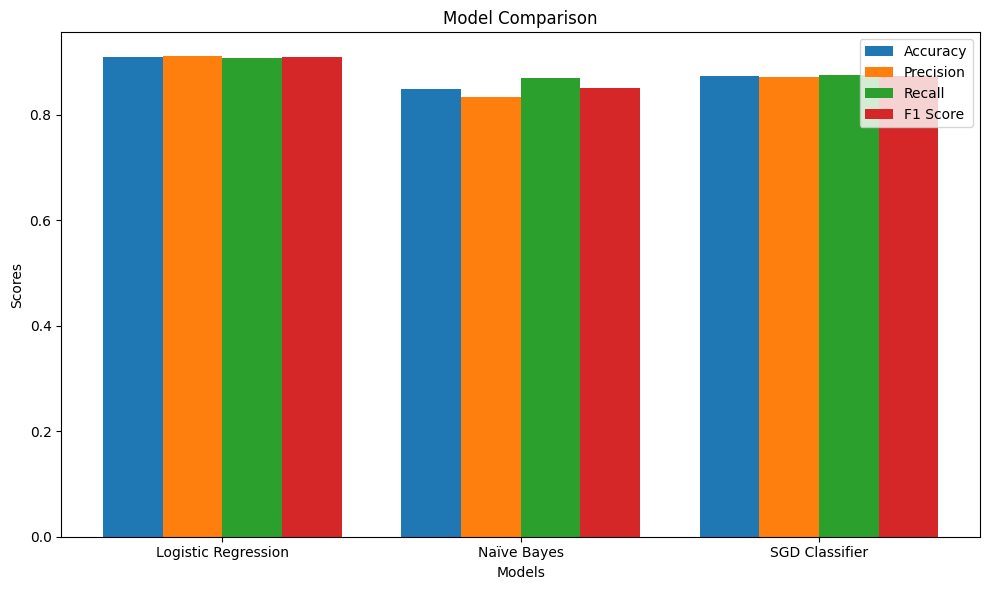

The best model based on F1 Score is: Logistic Regression


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Model results
models = ['Logistic Regression', 'Naïve Bayes', 'SGD Classifier']
accuracy = [0.9093, 0.8483, 0.8739]
precision = [0.9109, 0.8338, 0.8721]
recall = [0.9073, 0.8701, 0.8764]
f1_score = [0.9091, 0.8516, 0.8742]

# Create a bar chart
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width*1.5, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index - bar_width*0.5, precision, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width*0.5, recall, bar_width, label='Recall')
bar4 = ax.bar(index + bar_width*1.5, f1_score, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Determine the best model based on the metrics
best_model = max(zip(f1_score, models), key=lambda x: x[0])[1]
print(f"The best model based on F1 Score is: {best_model}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model results with log loss included
models = ['Logistic Regression', 'Naïve Bayes', 'SGD Classifier']
accuracy = [0.9093, 0.8483, 0.8739]
precision = [0.9109, 0.8338, 0.8721]
recall = [0.9073, 0.8701, 0.8764]
f1_score = [0.9091, 0.8516, 0.8742]
log_loss = [0.2292, 0.4007, 0.3730]

# Create a bar chart
bar_width = 0.15
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting all metrics
bar1 = ax.bar(index - bar_width*2, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index - bar_width*1, precision, bar_width, label='Precision')
bar3 = ax.bar(index, recall, bar_width, label='Recall')
bar4 = ax.bar(index + bar_width*1, f1_score, bar_width, label='F1 Score')
bar5 = ax.bar(index + bar_width*2, log_loss, bar_width, label='Log Loss')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison (Including Log Loss)')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Determine the best model based on F1 Score
best_model = max(zip(f1_score, models), key=lambda x: x[0])[1]
print(f"The best model based on F1 Score is: {best_model}")


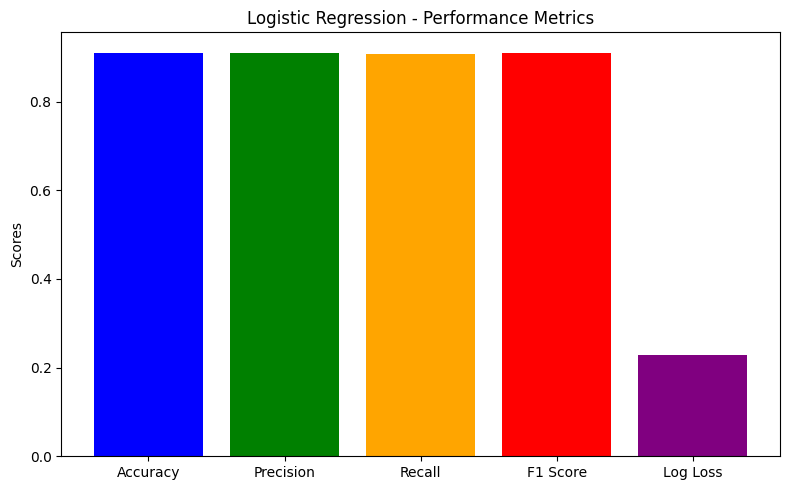

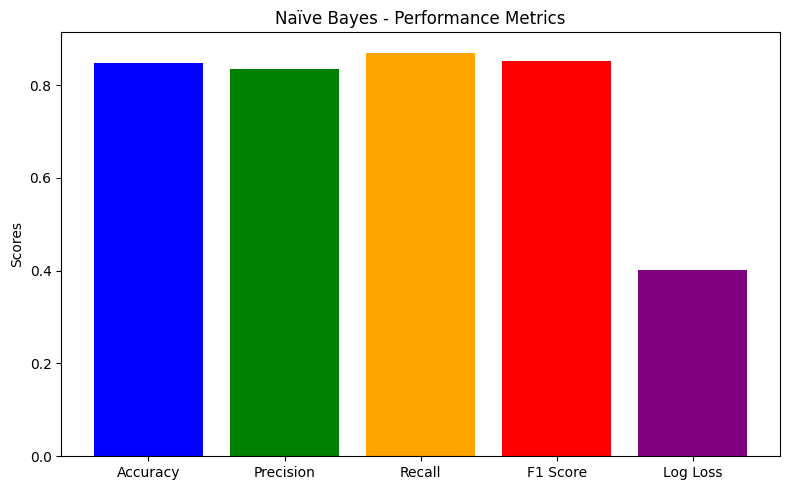

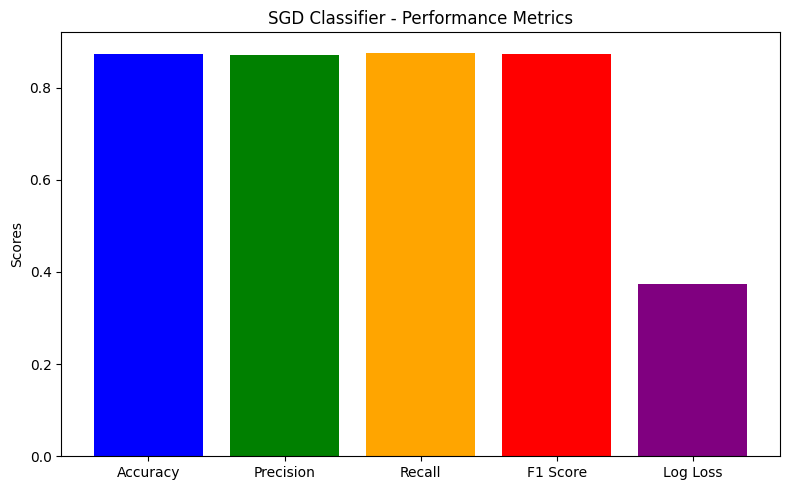

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Model results
models = ['Logistic Regression', 'Naïve Bayes', 'SGD Classifier']
accuracy = [0.9093, 0.8483, 0.8739]
precision = [0.9109, 0.8338, 0.8721]
recall = [0.9073, 0.8701, 0.8764]
f1_score = [0.9091, 0.8516, 0.8742]
log_loss = [0.2292, 0.4007, 0.3730]

# Create a function to plot graphs for each model
def plot_model_comparison(model_name, accuracy, precision, recall, f1_score, log_loss):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss']
    values = [accuracy, precision, recall, f1_score, log_loss]

    # Create the bar chart for a single model
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])

    # Add labels and title
    ax.set_ylabel('Scores')
    ax.set_title(f'{model_name} - Performance Metrics')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot graphs for each model
for i, model in enumerate(models):
    plot_model_comparison(
        model,
        accuracy[i],
        precision[i],
        recall[i],
        f1_score[i],
        log_loss[i]
    )

In [ ]:
# Support Vector Regressor (SVR)
from sklearn.svm import SVR

# Train SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_tfidf.toarray(), y_train)  # SVR requires a dense matrix

# Predict on test data
y_pred_svr = svr_model.predict(X_test_tfidf.toarray())

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred_svr.round())  # rounding for classification tasks
precision = precision_score(y_test, y_pred_svr.round(), average='weighted')
recall = recall_score(y_test, y_pred_svr.round(), average='weighted')
f1 = f1_score(y_test, y_pred_svr.round(), average='weighted')
loss = log_loss(y_test, svr_model.predict_proba(X_test_tfidf))

# MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
r2 = r2_score(y_test, y_pred_svr)

# Print Results
print(f"📊 Support Vector Regressor Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.show()

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_tfidf)

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred_gb.round())  # rounding for classification tasks
precision = precision_score(y_test, y_pred_gb.round(), average='weighted')
recall = recall_score(y_test, y_pred_gb.round(), average='weighted')
f1 = f1_score(y_test, y_pred_gb.round(), average='weighted')
loss = log_loss(y_test, gb_model.predict_proba(X_test_tfidf))

# MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_gb)

# Print Results
print(f"📊 Gradient Boosting Regressor Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: Actual vs Predicted")
plt.show()